# Titanic Survival Prediction using DT Classifier

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

### Load .csv file

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Inspect the dataset

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Identify the target columns
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


### Clean the dataset

In [ ]:
# Drop unnecessary columns/features before train the model
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [ ]:
# Label sex into numeric form using LabelEncoder()
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


<Axes: >

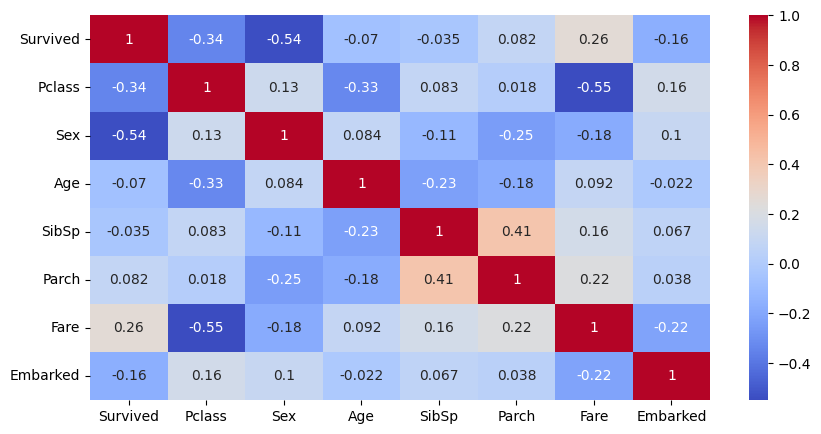

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Split the dataset into Features(X) and Target(y)

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

### Split the dataset into train/test set and Scale up

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model using Decision Tree

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy Score: 79.33%


### Hyperparameter Tuning using GridSearchCV

We will use `GridSearchCV` to systematically work through multiple combinations of parameter tunings, cross-validate them, and determine the optimal set of hyperparameters that results in the best model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # Max depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Initialize DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score*100:.2f}%")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-validation Accuracy: 82.30%


### Train and Evaluate the Model with Best Parameters

Now, let's train a new Decision Tree model using the `best_params_` found by `GridSearchCV` and evaluate its performance on the test set.

In [ ]:
# Train a new model with the best parameters
optimized_model = tree.DecisionTreeClassifier(**best_params, random_state=42)
optimized_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

Optimized Model Accuracy: 79.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Visualize the scattered data

In [ ]:
X_test_vis = X_test.copy()
X_test_vis['Survived_Predicted'] = y_pred
X_test_vis['Survived'] = y_test.values
X_test_vis.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Predicted,Survived
709,3,1,29.699118,1,1,15.2458,0,0,1
439,2,1,31.000000,0,0,10.5000,2,1,0
840,3,1,20.000000,0,0,7.9250,2,1,0
720,2,0,6.000000,0,1,33.0000,2,1,1
39,3,0,14.000000,1,0,11.2417,0,1,1


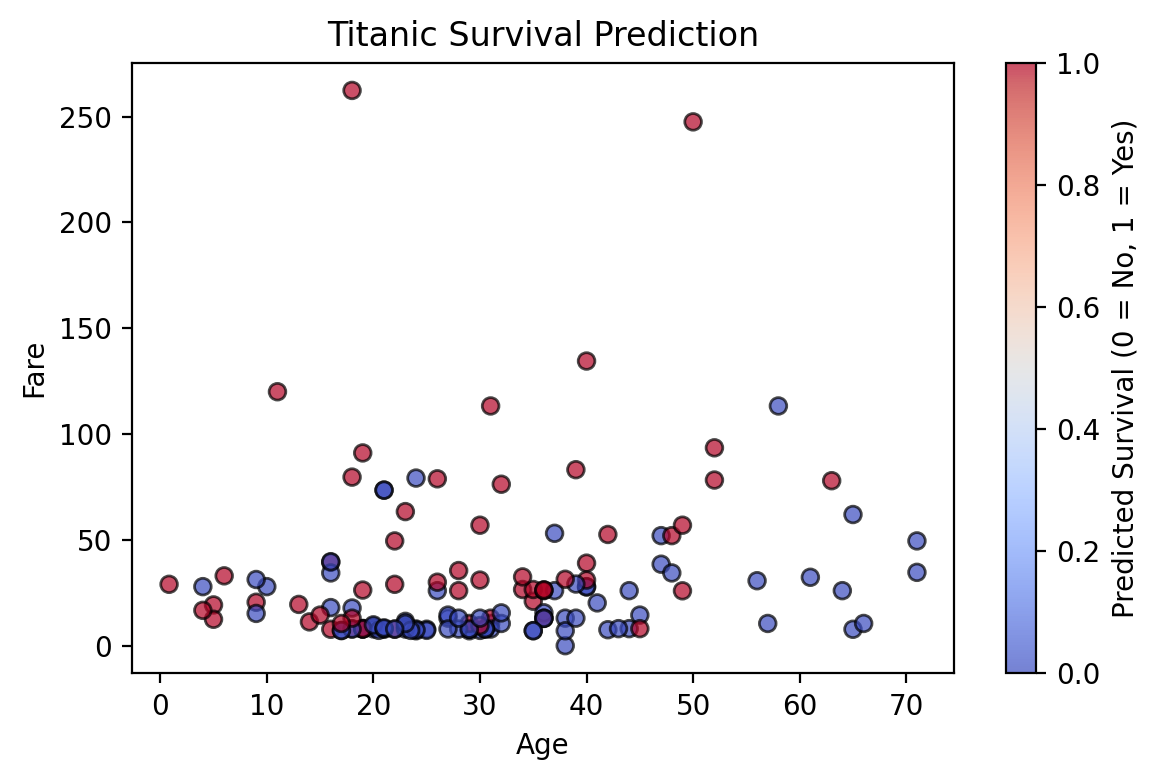

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=200)
plt.scatter(X_test_vis['Age'], X_test_vis['Fare'], c=X_test_vis['Survived'], cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('Titanic Survival Prediction')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Predicted Survival (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

In [ ]:
print(y_test, y_test.values)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64 [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
